### Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
from datetime import date, timedelta   
import nltk
%matplotlib inline

### 1. Data ghathring

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210501, 210508, 210515,210529,210605,210612,210619,210626,210703,210710,210717,210724,210731]
df = get_data(week_nums)

### 2. Data Exploring

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008


In [4]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209458,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,05:00:00,REGULAR,5554,589
209459,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,09:00:00,REGULAR,5554,589
209460,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,13:00:00,REGULAR,5554,589
209461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,17:00:00,REGULAR,5554,590
209462,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,21:00:00,REGULAR,5554,591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [6]:
df.describe()

,ENTRIES,EXITS
count,2.721477e+06,2.721477e+06
mean,4.187829e+07,3.352181e+07
std,2.189091e+08,1.927547e+08
min,0.000000e+00,0.000000e+00
25%,2.168880e+05,9.585300e+04
50%,1.419220e+06,8.587600e+05
75%,6.049660e+06,3.980241e+06
max,2.147430e+09,2.122941e+09


In [7]:
df.shape

(2721477, 11)

In [8]:
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [9]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
df['STATION'].value_counts()

34 ST-PENN STA     55619
FULTON ST          52376
GRD CNTRL-42 ST    48482
23 ST              39852
86 ST              35390
                   ...  
ALABAMA AV          1628
182-183 STS         1627
ORCHARD BEACH       1613
SUTTER AV           1092
CLEVELAND ST        1090
Name: STATION, Length: 379, dtype: int64

In [11]:
df['TIME'].value_counts()

08:00:00    232912
12:00:00    232912
00:00:00    232900
16:00:00    232900
04:00:00    232863
             ...  
21:51:05         1
13:51:15         1
15:59:15         1
09:07:16         1
00:12:55         1
Name: TIME, Length: 54464, dtype: int64

In [12]:
df['DATE'].value_counts().sort_index()

04/24/2021    29924
04/25/2021    29844
04/26/2021    29803
04/27/2021    29973
04/28/2021    29817
              ...  
07/26/2021    29816
07/27/2021    29928
07/28/2021    29923
07/29/2021    30016
07/30/2021    30061
Name: DATE, Length: 91, dtype: int64

In [13]:
df['UNIT'].value_counts()

R549    37157
R057    27852
R014    27263
R540    25953
R029    25516
        ...  
R433     1628
R237     1627
R459     1613
R349     1092
R435     1090
Name: UNIT, Length: 469, dtype: int64

In [14]:
df['DIVISION'].value_counts()

IRT    978201
IND    949508
BMT    602095
PTH    168776
SRT     17461
RIT      5436
Name: DIVISION, dtype: int64

In [15]:
df['DESC'].value_counts()

REGULAR       2709955
RECOVR AUD      11522
Name: DESC, dtype: int64

In [16]:
df['SCP'].value_counts()

00-00-00    252686
00-00-01    250981
00-00-02    223093
00-00-03    112618
00-03-00     99010
             ...  
03-00-08         6
01-02-08         5
01-00-11         1
01-00-10         1
00-B8-02         1
Name: SCP, Length: 227, dtype: int64

In [17]:
df.groupby(['DIVISION', 'STATION']).size()

DIVISION  STATION        
BMT       1 AV               13092
          104 ST              2188
          111 ST              2166
          121 ST              3234
          14 ST-UNION SQ     14739
                             ...  
PTH       TWENTY THIRD ST     4633
RIT       RIT-MANHATTAN       2164
          RIT-ROOSEVELT       3272
SRT       ST. GEORGE         13639
          TOMPKINSVILLE       3822
Length: 449, dtype: int64

### 3. Data Cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [19]:
df.columns=[column.strip()for column in df.columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 249.2+ MB


#### Rename columns

In [21]:
df.rename({'C/A': 'control_area', 'UNIT': 'unit','SCP':'subunit_channel_position','STATION':'station','LINENAME':'line_name','DIVISION':'division','DATE':'date','TIME':'time','DESC':'description','ENTRIES':'entries','EXITS':'exits'}, axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   control_area              object
 1   unit                      object
 2   subunit_channel_position  object
 3   station                   object
 4   line_name                 object
 5   division                  object
 6   date                      object
 7   time                      object
 8   description               object
 9   entries                   int64 
 10  exits                     int64 
dtypes: int64(2), object(9)
memory usage: 249.2+ MB


In [23]:
df.shape[0]

2721477

In [24]:
df.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
line_name                   0
division                    0
date                        0
time                        0
description                 0
entries                     0
exits                       0
dtype: int64

#### No null values

In [25]:
df =df[df['description'] != 'RECOVR AUD' ]

#### Drop duplicate

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df['description'].value_counts()

REGULAR    2709955
Name: description, dtype: int64

In [28]:
df.description.value_counts()

REGULAR    2709955
Name: description, dtype: int64

In [29]:
df["date_time"] = pd.to_datetime(df.date + " " + df.time, 
                                            format="%m/%d/%Y %H:%M:%S")

In [30]:
#Check that there is no duplicate
(df
 .groupby(["control_area", "unit", "subunit_channel_position", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)


,control_area,unit,subunit_channel_position,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-04-24 00:00:00,1
1806631,R138,R293,00-03-02,34 ST-PENN STA,2021-06-03 22:00:00,1
1806633,R138,R293,00-03-02,34 ST-PENN STA,2021-06-04 06:00:00,1
1806634,R138,R293,00-03-02,34 ST-PENN STA,2021-06-04 10:00:00,1
1806635,R138,R293,00-03-02,34 ST-PENN STA,2021-06-04 10:28:37,1


#### No more duplicate

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709955 entries, 0 to 209462
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   control_area              object        
 1   unit                      object        
 2   subunit_channel_position  object        
 3   station                   object        
 4   line_name                 object        
 5   division                  object        
 6   date                      object        
 7   time                      object        
 8   description               object        
 9   entries                   int64         
 10  exits                     int64         
 11  date_time                 datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 268.8+ MB


In [32]:
df.head()

,control_area,unit,subunit_channel_position,station,line_name,division,date,time,description,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


#### Make a turnstile dataframe

In [33]:
turnstiles_daily = (df
                        .groupby(["control_area", "unit", "subunit_channel_position", "station", "date"],as_index=False)
                        .entries.first())

In [34]:
turnstiles_daily.head()

,control_area,unit,subunit_channel_position,station,date,entries
0,A002,R051,02-00-00,59 ST,04/24/2021,7561288
1,A002,R051,02-00-00,59 ST,04/25/2021,7561638
2,A002,R051,02-00-00,59 ST,04/26/2021,7561870
3,A002,R051,02-00-00,59 ST,04/27/2021,7562365
4,A002,R051,02-00-00,59 ST,04/28/2021,7562953


#### adding a new columns in turnstile dataframe

In [35]:
turnstiles_daily[["pre_date", "pre_entries"]] = (turnstiles_daily
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["date", "entries"]
                                                       .apply(lambda grp: grp.shift(1)))
#apply the shift function by 1

<ipython-input-35-0df0482dca0c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["pre_date", "pre_entries"]] = (turnstiles_daily


In [36]:
turnstiles_daily["diff"] = (turnstiles_daily
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["entries"]
                                                       .apply(lambda x: x.diff()))

In [37]:
turnstiles_daily.head()

,control_area,unit,subunit_channel_position,station,date,entries,pre_date,pre_entries,diff
0,A002,R051,02-00-00,59 ST,04/24/2021,7561288,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/25/2021,7561638,04/24/2021,7561288.0,350.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7561870,04/25/2021,7561638.0,232.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562365,04/26/2021,7561870.0,495.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7562953,04/27/2021,7562365.0,588.0


In [38]:
turnstiles_daily.tail()

,control_area,unit,subunit_channel_position,station,date,entries,pre_date,pre_entries,diff
454074,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/26/2021,5554,07/25/2021,5554.0,0.0
454075,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/27/2021,5554,07/26/2021,5554.0,0.0
454076,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/28/2021,5554,07/27/2021,5554.0,0.0
454077,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/29/2021,5554,07/28/2021,5554.0,0.0
454078,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/30/2021,5554,07/29/2021,5554.0,0.0


In [39]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["pre_date",'pre_entries'], axis=0, inplace=True)

In [40]:
turnstiles_daily.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
date                        0
entries                     0
pre_date                    0
pre_entries                 0
diff                        0
dtype: int64

In [41]:
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]]

,control_area,unit,subunit_channel_position,station,date,entries,pre_date,pre_entries,diff
3550,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,885609559,04/24/2021,8.856097e+08,-166.0
3551,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,885609408,04/25/2021,8.856096e+08,-151.0
3552,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,885609207,04/26/2021,8.856094e+08,-201.0
3553,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,885608991,04/27/2021,8.856092e+08,-216.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,885608748,04/28/2021,8.856090e+08,-243.0
...,...,...,...,...,...,...,...,...,...
450259,R730,R431,00-00-04,EASTCHSTER/DYRE,07/27/2021,1559803712,07/26/2021,1.559804e+09,-158.0
450260,R730,R431,00-00-04,EASTCHSTER/DYRE,07/28/2021,1559803547,07/27/2021,1.559804e+09,-165.0
450261,R730,R431,00-00-04,EASTCHSTER/DYRE,07/29/2021,1559803380,07/28/2021,1.559804e+09,-167.0
450262,R730,R431,00-00-04,EASTCHSTER/DYRE,07/30/2021,1559803230,07/29/2021,1.559803e+09,-150.0


In [42]:
turnstiles_daily["station"][turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]].value_counts()

42 ST-PORT AUTH    271
DEKALB AV          268
14 ST              180
BAY PKWY           180
GRD CNTRL-42 ST    160
                  ... 
9TH STREET           1
BERGEN ST            1
145 ST               1
52 ST                1
66 ST-LINCOLN        1
Name: station, Length: 115, dtype: int64

In [43]:
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]].head()

,control_area,unit,subunit_channel_position,station,date,entries,pre_date,pre_entries,diff
3550,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,885609559,04/24/2021,885609725.0,-166.0
3551,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,885609408,04/25/2021,885609559.0,-151.0
3552,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,885609207,04/26/2021,885609408.0,-201.0
3553,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,885608991,04/27/2021,885609207.0,-216.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,885608748,04/28/2021,885608991.0,-243.0


In [44]:
(turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]]
    .groupby(["control_area", "unit", "subunit_channel_position", "station"])
    .size())

control_area  unit  subunit_channel_position  station        
A011          R080  01-03-00                  57 ST-7 AV         90
                    01-03-03                  57 ST-7 AV          1
                    01-03-04                  57 ST-7 AV          1
A013          R081  01-06-01                  49 ST               2
A014          R081  02-00-00                  49 ST               1
                                                                 ..
R612          R057  01-05-00                  ATL AV-BARCLAY      1
R617          R058  00-00-02                  BERGEN ST           1
R622          R123  00-00-00                  FRANKLIN AV        90
R730          R431  00-00-04                  EASTCHSTER/DYRE    88
TRAM2         R469  00-05-00                  RIT-ROOSEVELT       1
Length: 214, dtype: int64

#### Fixing the order problem

In [45]:
def get_daily_counts(row,max_counter):
    counter=row['entries'] - row['pre_entries']
    if counter<0:
        counter= - counter
    if counter >max_counter:
        print(row['entries'],row['pre_entries'])
        return 0
    return counter

x = turnstiles_daily.apply(get_daily_counts ,axis=1,max_counter=1000000)


3091 1390173.0
1308 4340554.0
14 1028362.0
327680 756269765.0
193 8049630.0
0 5309746.0
16 2651099.0
30 2627867.0
200 1605012.0
6006 4298763.0
237 8882974.0
132 4454753.0
189 7643368.0
328039 7577096.0
238 4780275.0
4 1534984195.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517625 94.0
95 5405384.0
687970645 19471254.0
30 7489966.0
16777220 1037158.0
271 6101347.0
4825276 12538332.0
12539185 4825276.0
181 1657902.0
231 2524688.0
262156 2393343.0
67437911 375578.0
20 4070949.0
35 58304767.0
5430 2341294.0
2 33030303.0
572 5198164.0
111 2320052.0
302 1953511.0
90 4788199.0
393412 104110962.0
118 909043446.0
406 4470923.0
197281 1891026.0
196879 3277263.0
87 303654987.0
11 3145365.0
35 10736984.0
146668937 1123536132.0
1191142633 12133821.0
1441860 12919099.0
13943214 8899046.0
69 4183423.0
199 1653251.0
432 11851565.0
24 1925928.0
327683 50346231.0
14455033 262146.0
0 14455033.0


In [46]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["pre_entries"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["entries"], row["pre_entries"])
        counter = min(row["entries"], row["pre_entries"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["daily_entries"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3091 1390173.0
1308 4340554.0
14 1028362.0
327680 756269765.0
193 8049630.0
0 5309746.0
16 2651099.0
30 2627867.0
200 1605012.0
6006 4298763.0
237 8882974.0
132 4454753.0
189 7643368.0
328039 7577096.0
238 4780275.0
4 1534984195.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517625 94.0
95 5405384.0
687970645 19471254.0
30 7489966.0
16777220 1037158.0
271 6101347.0
4825276 12538332.0
12539185 4825276.0
181 1657902.0
231 2524688.0
262156 2393343.0
67437911 375578.0
20 4070949.0
35 58304767.0
5430 2341294.0
2 33030303.0
572 5198164.0
111 2320052.0
302 1953511.0
90 4788199.0
393412 104110962.0
118 909043446.0
406 4470923.0
197281 1891026.0
196879 3277263.0
87 303654987.0
11 3145365.0
35 10736984.0
146668937 1123536132.0
1191142633 12133821.0
1441860 12919099.0
13943214 8899046.0
69 4183423.0
199 1653251.0
432 11851565.0
24 1925928.0
327683 50346231.0
14455033 262146.0
0 14455033.0


In [47]:
turnstiles_daily.head(4)

,control_area,unit,subunit_channel_position,station,date,entries,pre_date,pre_entries,diff,daily_entries
1,A002,R051,02-00-00,59 ST,04/25/2021,7561638,04/24/2021,7561288.0,350.0,350.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7561870,04/25/2021,7561638.0,232.0,232.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562365,04/26/2021,7561870.0,495.0,495.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7562953,04/27/2021,7562365.0,588.0,588.0


In [48]:
ca_unit_station_daily = turnstiles_daily.groupby(["control_area", "unit", "station", "date"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily.head()

,control_area,unit,station,date,daily_entries
0,A002,R051,59 ST,04/25/2021,3054.0
1,A002,R051,59 ST,04/26/2021,1872.0
2,A002,R051,59 ST,04/27/2021,4578.0
3,A002,R051,59 ST,04/28/2021,4827.0
4,A002,R051,59 ST,04/29/2021,4864.0


In [49]:
station_daily = turnstiles_daily.groupby(["station", "date"])[['daily_entries']].sum().reset_index()
station_daily.head()

,station,date,daily_entries
0,1 AV,04/25/2021,6588.0
1,1 AV,04/26/2021,4071.0
2,1 AV,04/27/2021,6767.0
3,1 AV,04/28/2021,6998.0
4,1 AV,04/29/2021,7224.0


#### The busiest station is 34 ST-PENN STA

In [50]:
station_totals=station_daily.groupby('station').sum().sort_values('daily_entries', ascending=False).reset_index()
station_totals

,station,daily_entries
0,34 ST-PENN STA,4799084.0
1,FULTON ST,4168143.0
2,PATH NEW WTC,3847055.0
3,34 ST-HERALD SQ,3762874.0
4,86 ST,3649763.0
...,...,...
374,TOMPKINSVILLE,26775.0
375,BEACH 98 ST,16321.0
376,BEACH 105 ST,11025.0
377,BROAD CHANNEL,10812.0


In [51]:
station_totals

,station,daily_entries
0,34 ST-PENN STA,4799084.0
1,FULTON ST,4168143.0
2,PATH NEW WTC,3847055.0
3,34 ST-HERALD SQ,3762874.0
4,86 ST,3649763.0
...,...,...
374,TOMPKINSVILLE,26775.0
375,BEACH 98 ST,16321.0
376,BEACH 105 ST,11025.0
377,BROAD CHANNEL,10812.0


In [52]:
len(df.station.unique())

379

In [53]:
df['time_str'] = df['time'].str[:2]
#Only the hours

In [54]:
df['date_str'] = df['date'].str[:2]
#Only the months

### 4. Data Visualization

#### Represnting the division

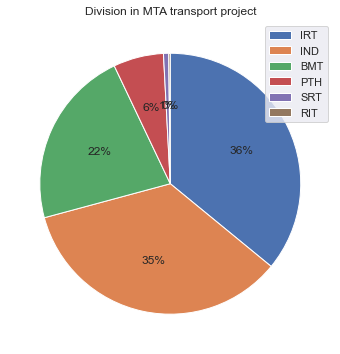

In [55]:
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = 6,6
sorted_counts = df['division'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.0f%%' );
plt.title('Division in MTA transport project');
plt.legend(sorted_counts.index);

##### The biggest division is IRT Interborough Rapid Transit Company

#### The most repeted stations in MTA data set

In [56]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 216
    s = 70
    l = int(100.0 * float(random_state.randint(50, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [57]:
text=" ".join(df["station"])

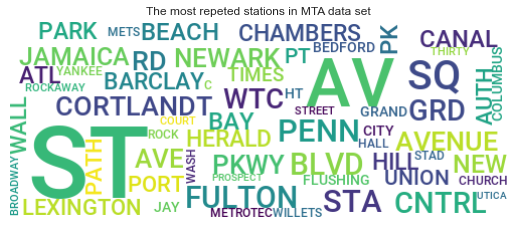

In [58]:
plt.rcParams['figure.figsize'] =9, 4
wordcloud = WordCloud(font_path="Roboto-Medium.ttf",max_font_size=100, max_words=60, background_color="white",width=500, height=200,collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most repeted stations in MTA data set")
plt.show();

##### The most reapeted station is ST

#### The number of weekly entreis in million
#### The busiest station with the weekly entries

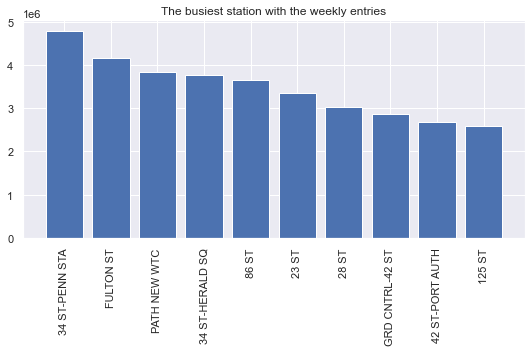

In [59]:
plt.rcParams['figure.figsize'] =9, 4

plt.bar(x=station_totals['station'][:10], height=station_totals['daily_entries'][:10])

plt.xticks(rotation=90)
plt.title('The busiest station with the weekly entries');

##### The busiest station is 34-ST-PENNSTA

#### Rush hours

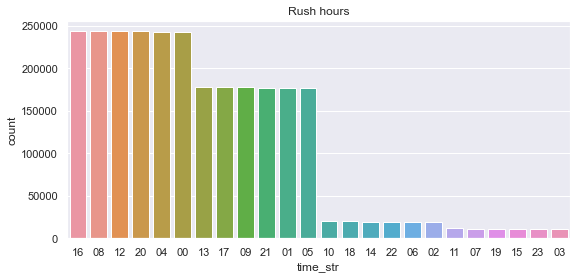

In [60]:
plt.rcParams['figure.figsize'] =9, 4
sns.countplot(data=df, x='time_str',order = df['time_str'].value_counts().index)
plt.title('Rush hours');

##### The peek hours are 12,4,6 AM
##### The peek hours are 12,4,8 PM

#### Rush months

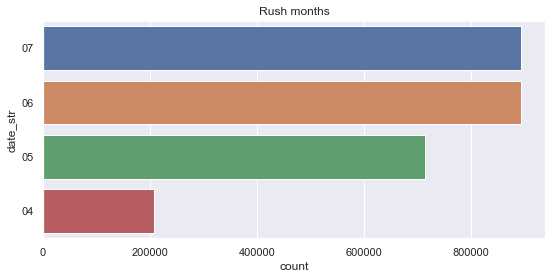

In [61]:
plt.rcParams['figure.figsize'] =9, 4
sns.countplot(data=df, y='date_str',order = df['date_str'].value_counts().index)
plt.title('Rush months');

##### The busiest month is July of 2021